In [103]:
import pandas as pd 
import numpy as np 
import requests as re 
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

# EMPIEZA PROYECTO 

## ETL (O AL MENOS ESO ES LO QUE CREO) 

In [2]:
archivo_homicidios = pd.read_csv('homicidios.xlsx - HECHOS.csv', encoding='utf-8',)
#archivo = pd.read_csv('')

In [3]:
archivo_victimas = pd.read_csv('C:\\Users\\h98go\\Desktop\\Segundo proyecto\\homicidios.xlsx - VICTIMAS.csv', encoding = 'utf-8')

In [8]:
archivo_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   FECHA                717 non-null    object
 2   AAAA                 717 non-null    int64 
 3   MM                   717 non-null    int64 
 4   DD                   717 non-null    int64 
 5   ROL                  717 non-null    object
 6   VICTIMA              717 non-null    object
 7   SEXO                 717 non-null    object
 8   EDAD                 717 non-null    object
 9   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: int64(3), object(7)
memory usage: 56.1+ KB


In [9]:
archivo_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

#### Comparo si las columnas con el mismo nombre son exactamente iguales. 

In [16]:
archivo_homicidios['VICTIMA'].equals(archivo_victimas['VICTIMA'])

False

#### Podemos comprobar que no son iguales las columnas pre procesamiento de los datos 

### Eliminacion de columnas irrelevantes o redundantes para el objetivo del proceso 

#### Estas columnas se deciden eliminar al poseer informacion que ya se encuentra en otras columnas.

In [4]:
archivo_homicidios.drop(columns=['PARTICIPANTES','HORA','Altura','Cruce','Dirección Normalizada'], inplace=True)

In [5]:
archivo_homicidios.drop(columns=['XY (CABA)'],inplace=True)

In [6]:
archivo_victimas.drop(columns=['FECHA_FALLECIMIENTO'], inplace=True)

In [83]:
archivo_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 695
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   ID               695 non-null    object             
 1   N_VICTIMAS       695 non-null    int64              
 2   FECHA            695 non-null    date64[ms][pyarrow]
 3   AAAA             695 non-null    int64              
 4   MM               695 non-null    int64              
 5   DD               695 non-null    int64              
 6   HH               695 non-null    int32              
 7   LUGAR_DEL_HECHO  695 non-null    object             
 8   TIPO_DE_CALLE    695 non-null    object             
 9   Calle            694 non-null    object             
 10  COMUNA           695 non-null    int64              
 11  pos x            695 non-null    object             
 12  pos y            695 non-null    object             
 13  VICTIMA          695 non-

In [22]:
archivo_homicidios.describe(include='all')

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO
count,696,696.000000,696,696.000000,696.000000,696.000000,696,696,696,695,696.000000,696,696,696,696,696
unique,696,NaN,598,NaN,NaN,NaN,25,683,4,279,NaN,606,605,605,10,10
top,2016-0001,NaN,12/18/2018,NaN,NaN,NaN,7,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,"PAZ, GRAL. AV.",NaN,Point (. .),.,.,MOTO,AUTO
freq,1,NaN,3,NaN,NaN,NaN,41,4,429,57,NaN,14,12,12,295,204
mean,NaN,1.030172,NaN,2018.188218,6.692529,15.936782,NaN,NaN,NaN,NaN,7.425287,NaN,NaN,NaN,NaN,NaN
std,NaN,0.179393,NaN,1.683754,3.571309,8.639646,NaN,NaN,NaN,NaN,4.387050,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,2017.000000,4.000000,9.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,2018.000000,7.000000,16.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,2020.000000,10.000000,23.000000,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN


#### Aqui poemos verificar un dato muy llamativo, pre filtrado de los datos, el mes de octubre es el mes en que con mas frecuencia suceden los accidentes de transito. 


#### Ademas tambien se puede apreciar la presencia de ciertos valores a normalizar 

### Cuantos nulos hay 

In [23]:
archivo_homicidios.isnull().sum()

ID                 0
N_VICTIMAS         0
FECHA              0
AAAA               0
MM                 0
DD                 0
HH                 0
LUGAR_DEL_HECHO    0
TIPO_DE_CALLE      0
Calle              1
COMUNA             0
XY (CABA)          0
pos x              0
pos y              0
VICTIMA            0
ACUSADO            0
dtype: int64

In [29]:
archivo_victimas.describe(include='all')

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
count,717,717,717.000000,717.000000,717.000000,717,717,717,717,717
unique,696,598,NaN,NaN,NaN,5,8,3,86,563
top,2017-0035,2/26/2017,NaN,NaN,NaN,CONDUCTOR,MOTO,MASCULINO,SD,SD
freq,3,3,NaN,NaN,NaN,330,303,545,53,68
mean,NaN,NaN,2018.174338,6.688982,15.960948,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.672655,3.575140,8.683358,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2017.000000,4.000000,9.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2018.000000,7.000000,16.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2019.000000,10.000000,23.000000,NaN,NaN,NaN,NaN,NaN


In [32]:
archivo_victimas.isnull().sum()

ID_hecho    0
FECHA       0
AAAA        0
MM          0
DD          0
ROL         0
VICTIMA     0
SEXO        0
EDAD        0
dtype: int64

#### Podemos apreciar que a simple vista no hay valores nulos reelevvantes. 

### Analizamos la posible conversion de tipos de datos de las columnas despues de la eliminacion de las columnas. 

In [37]:
archivo_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID_hecho  717 non-null    object
 1   FECHA     717 non-null    object
 2   AAAA      717 non-null    int64 
 3   MM        717 non-null    int64 
 4   DD        717 non-null    int64 
 5   ROL       717 non-null    object
 6   VICTIMA   717 non-null    object
 7   SEXO      717 non-null    object
 8   EDAD      717 non-null    object
dtypes: int64(3), object(6)
memory usage: 50.5+ KB


#### 
* 'id victimas' deberia ser tipo int al no ser una codificacion alfanumerica
* 'fecha' deberia ser un formato date 
* Edad deberia ser un valor numerico.

### Convertimos la columna fecha a su tipo de dato correspondiente. 

In [7]:
archivo_victimas['FECHA']= archivo_homicidios['FECHA'].astype('date32[pyarrow]')

In [34]:
archivo_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               696 non-null    object
 1   N_VICTIMAS       696 non-null    int64 
 2   FECHA            696 non-null    object
 3   AAAA             696 non-null    int64 
 4   MM               696 non-null    int64 
 5   DD               696 non-null    int64 
 6   HH               696 non-null    object
 7   LUGAR_DEL_HECHO  696 non-null    object
 8   TIPO_DE_CALLE    696 non-null    object
 9   Calle            695 non-null    object
 10  COMUNA           696 non-null    int64 
 11  XY (CABA)        696 non-null    object
 12  pos x            696 non-null    object
 13  pos y            696 non-null    object
 14  VICTIMA          696 non-null    object
 15  ACUSADO          696 non-null    object
dtypes: int64(5), object(11)
memory usage: 87.1+ KB


####
* 'id' deberia ser un tipo numerico 
* 'fecha' deberia ser un formato date
* 'hh' deberia ser un valor entero numerico 


In [8]:
archivo_homicidios['FECHA']= archivo_homicidios['FECHA'].astype('date32[pyarrow]')

### SE ELIMINA EL VALOR AL SER IRREVALENTE EN COMPARACION AL TAMAÑO DEL DATASET 

In [9]:
archivo_homicidios['HH'].replace('SD',pd.NA,inplace=True)

C:\Users\h98go\AppData\Local\Temp\ipykernel_19196\2192316913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  archivo_homicidios['HH'].replace('SD',pd.NA,inplace=True)


In [10]:
archivo_homicidios['HH'] = pd.to_numeric(archivo_homicidios['HH'], errors='coerce')

In [11]:
archivo_homicidios = archivo_homicidios.dropna(subset=['HH'])

In [12]:
archivo_homicidios['HH']= archivo_homicidios['HH'].astype(int)

### Aqui termina el proceso 


### Manejo de valores nulos en la columna edad 

In [14]:
archivo_victimas['EDAD'].replace('SD',value= None, inplace= True)

C:\Users\h98go\AppData\Local\Temp\ipykernel_19196\1696657736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  archivo_victimas['EDAD'].replace('SD',value= None, inplace= True)


In [15]:
archivo_victimas['EDAD'].replace('NoneType',value= 0, inplace= True)

C:\Users\h98go\AppData\Local\Temp\ipykernel_19196\542257912.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  archivo_victimas['EDAD'].replace('NoneType',value= 0, inplace= True)


In [16]:
archivo_victimas['EDAD'].fillna(0, inplace=True)

C:\Users\h98go\AppData\Local\Temp\ipykernel_19196\1436793878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  archivo_victimas['EDAD'].fillna(0, inplace=True)


In [17]:
archivo_victimas['EDAD']= archivo_victimas['EDAD'].astype(int)

In [18]:
# Contador de los valores nulos 
archivo_victimas[archivo_victimas['EDAD'] == 0]['EDAD'].count()


53

In [26]:
archivo_victimas[archivo_victimas['EDAD'] != 0]['EDAD'].describe(include='all')


count    664.000000
mean      42.167169
std       19.788034
min        1.000000
25%       27.000000
50%       37.000000
75%       56.250000
max       95.000000
Name: EDAD, dtype: float64

In [19]:
# reemplazo de valores nulos 

# Reemplazamos el valor '0' por NaN en la columna 'edad'
archivo_victimas['EDAD'] = archivo_victimas['EDAD'].replace(0, np.nan)

# Imputamos los valores nulos (ahora NaN) de la columna 'edad' con la mediana dentro de cada grupo de género
archivo_victimas['EDAD'] = archivo_victimas.groupby('SEXO')['EDAD'].transform(lambda x: x.fillna(x.median()))


C:\Users\h98go\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [20]:
archivo_victimas['EDAD'].isnull().sum()

6

In [21]:
# se eliminan esos valores nulos restantes
archivos_victimas = archivo_victimas.dropna(subset=['EDAD'],inplace=True)

In [22]:

archivo_victimas['EDAD'].isnull().sum()

0

### REchequeo del dataset 


In [79]:
archivo_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 695
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   ID               695 non-null    object             
 1   N_VICTIMAS       695 non-null    int64              
 2   FECHA            695 non-null    date64[ms][pyarrow]
 3   AAAA             695 non-null    int64              
 4   MM               695 non-null    int64              
 5   DD               695 non-null    int64              
 6   HH               695 non-null    int32              
 7   LUGAR_DEL_HECHO  695 non-null    object             
 8   TIPO_DE_CALLE    695 non-null    object             
 9   Calle            694 non-null    object             
 10  COMUNA           695 non-null    int64              
 11  XY (CABA)        695 non-null    object             
 12  pos x            695 non-null    object             
 13  pos y            695 non-

In [80]:
archivo_victimas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 0 to 716
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   ID_hecho  711 non-null    object             
 1   FECHA     711 non-null    date64[ms][pyarrow]
 2   AAAA      711 non-null    int64              
 3   MM        711 non-null    int64              
 4   DD        711 non-null    int64              
 5   ROL       711 non-null    object             
 6   VICTIMA   711 non-null    object             
 7   SEXO      711 non-null    object             
 8   EDAD      711 non-null    int32              
dtypes: date64[ms][pyarrow](1), int32(1), int64(3), object(4)
memory usage: 68.9+ KB


### Aqui termina el proceso 

### CONTINUAMOS MANEJANDO LOS VALORES NULOS 

#### Del dataset archivo_homicidios procedemos a analizar la columna lugar del hecho, una columna completamente reelevante ya que contiene informacion crucial para el objetivo del proyecto. 

In [31]:
# Se verifica los valores nulos que el sistema identiica como 'NULOS'
archivo_homicidios['LUGAR_DEL_HECHO'].isnull().sum()

0

#### Se puede observar que por defecto no hay valores nulos

#### Sin, embargo por informacion proporcionada en el proyecto se entiende como 'SD' a un valor sin dato o nulo en este caso,

In [23]:
# Se instacia una variable con el valor conocido como nulo 
valornulo = 'SD'
# se busca si ese valor existe y de estar, cuantas veces apareces para proceder con el analisis.
archivo_homicidios['LUGAR_DEL_HECHO'].value_counts().get(valornulo)

1

#### Considerando el tamaño, se procede a eliminar dicho valor nulo. Esta decision se toma en cuenta a la proporcion de los valores y, ademas a la delicadeza de los datos al necesitarse la maxima precision requerida es considerado mejor no extrapolar los resultados. 

In [24]:
# Eliminacion de el valor nulo 
archivo_homicidios = archivo_homicidios[archivo_homicidios['LUGAR_DEL_HECHO'] != 'SD']


In [25]:
# Comprobacion 
archivo_homicidios['LUGAR_DEL_HECHO'].value_counts().get(valornulo)

### Chequeo de valores duplicados en las columnas de identificacion 

#### Solo se chequea los valores duplicados en estas columnas por que es la unica que en el tras el analisis hecho no debee poseer valores duplicados. Esto siendo asi porque al ser una columna que posee un registro unico de acontecimientos no pueden ser repetidos.

In [36]:
archivo_homicidios

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,8,-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",9,-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,1,-58.39040293,-34.63189362,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,8,-58.46503904,-34.68092974,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,1,-58.38718297,-34.62246630,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,7,-58.43353773,-34.64561636,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",9,-58.46739825,-34.65117757,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,11,-58.47293407,-34.61984745,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",9,-58.47066794,-34.65021673,AUTO,CARGAS


In [37]:
archivo_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0
...,...,...,...,...,...,...,...,...,...
712,2021-0092,<NA>,2021,12,12,PEATON,PEATON,FEMENINO,50.0
713,2021-0093,<NA>,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18.0
714,2021-0094,<NA>,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43.0
715,2021-0095,<NA>,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27.0


In [26]:
# Se instancia una variable para porder vizualizar si existen duplicados
I = archivo_homicidios[archivo_homicidios.duplicated(subset=['ID'])]

In [27]:
print(I)

Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, COMUNA, pos x, pos y, VICTIMA, ACUSADO]
Index: []


#### Como se puede observar no hay duplicados 


In [28]:
u= archivo_victimas[archivo_victimas.duplicated(subset=['ID_hecho'])]
print(u)

      ID_hecho       FECHA  AAAA  MM  DD                   ROL VICTIMA  \
30   2016-0041  2016-03-30  2016   3  29  PASAJERO_ACOMPAÑANTE    MOTO   
99   2016-0126  2016-10-02  2016   9  18  PASAJERO_ACOMPAÑANTE    AUTO   
164  2017-0026  2017-03-07  2017   2  26             CONDUCTOR    AUTO   
174  2017-0035  2017-04-03  2017   3  23  PASAJERO_ACOMPAÑANTE    AUTO   
175  2017-0035  2017-04-03  2017   3  23  PASAJERO_ACOMPAÑANTE    AUTO   
177  2017-0036  2017-04-14  2017   3  29             CONDUCTOR    MOTO   
187  2017-0050  2017-05-11  2017   4  28  PASAJERO_ACOMPAÑANTE    MOTO   
238  2017-0108  2017-09-20  2017   9   2  PASAJERO_ACOMPAÑANTE    AUTO   
243  2017-0112  2017-10-13  2017   9  10  PASAJERO_ACOMPAÑANTE    AUTO   
254  2017-0126  2017-11-19  2017  10  14             CONDUCTOR    AUTO   
278  2017-0153  2018-01-09  2017  12  11             CONDUCTOR    MOTO   
301  2018-0015  2018-03-11  2018   2   6  PASAJERO_ACOMPAÑANTE    MOTO   
313  2018-0026  2018-04-21  2018   3  

#### Tras analizar la inforacion contenida en los valores 'duplicados', se llega a la conclusion de conservarlos ya que proporcionan mas detalle, nuevos datos y por lo tanto abren una puerta a un abanico diferentes de posibilidades.

### Proceso final de eliminacion de columnas.

#### Se decide eliminar las columnas referentes a fechas agrupadas de ambos datasets ya que es informacion que se posee con mas detalle, en este caso eso es lo que se requiere un mayor detalle de la informacion disponible 

In [29]:
# Eliminamos la columna fecha 
archivo_homicidios.drop(columns=['FECHA'],inplace=True)

In [30]:
archivo_victimas.drop(columns=['FECHA'],inplace=True)

## Aqui termina el ETL 

## AQUI COMIENZA EL EDA 

### Uso de pandas profilinf, prueba 

In [49]:
profile = ProfileReport(archivo_homicidios, title="Reporte de archivos homicidios", explorative=True)

In [50]:
profile.to_file("report.html")

Summarize dataset:  76%|███████▌  | 16/21 [00:01<00:00,  6.28it/s, Calculate auto correlation]       C:\Users\h98go\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 3 0 2 7 8 6 0 4 2 9 6 3 6 9 2 1 3 3 4 7 5 5 2 0 4 3 0 4 7 8 4 2 7 0 3
 1 8 3 9 8 1 6 6 7 6 7 9 1 6 2 9 6 9 9 7 2 3 7 8 9 9 6 0 6 2 9 4 1 2 3 7 6
 6 9 8 9 9 0 9 3 2 8 3 1 6 4 4 8 6 1 2 3 3 6 5 9 4 4 5 8 0 0 2 2 0 0 8 9 0
 9 1 5 8 8 9 9 7 9 6 6 6 8 2 3 2 3 2 3 2 3 4 6 7 8 3 8 0 3 0 1 6 0 1 7 0 5
 6 0 6 3 3 6 2 3 3 2 8 7 2 9 3 0 3 0 2 3 3 2 7 1 8 3 9 3 2 2 7 4 1 1 8 9 3
 9 3 3 5 6 4 2 6 7 0 8 6 5 9 3 5 9 6 9 6 4 9 0 5 6 3 4 9 5 2 5 9 6 3 3 8 5
 8 3 4 0 3 8 4 1 9 6 7 3 2 0 7 9 3 6 0 6 2 2 3 5 8 2 6 7 5 3 4 4 9 9 8 9 2
 7 4 4 5 0 0 7 0 3 9 3 9 1 5 6 9 6 4 3 9 9 0 7 0 2 4 5 3 8 0 4 

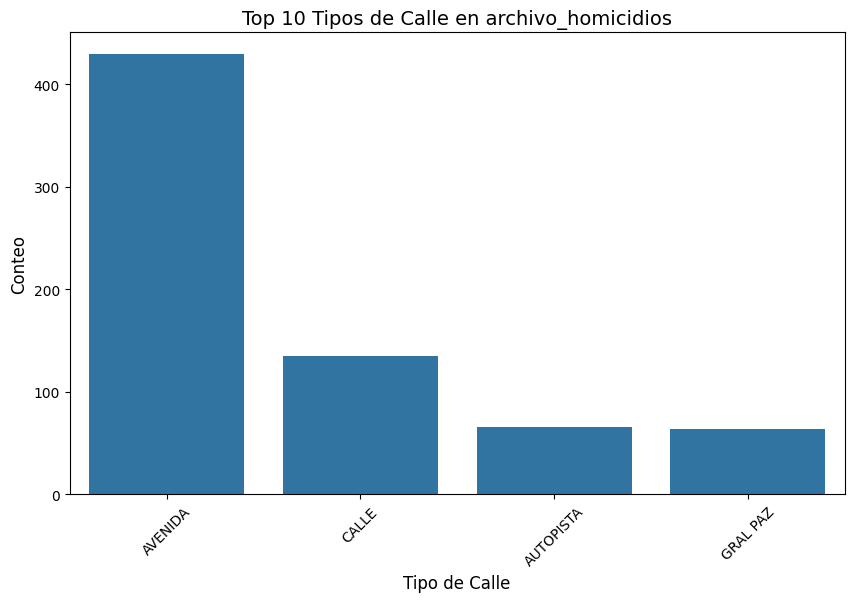

In [44]:
conteo_categorias_top10_tipo_calle = archivo_homicidios['TIPO_DE_CALLE'].value_counts()

# Configuración del tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Gráfico de barras para las 10 categorías más frecuentes
sns.barplot(x=conteo_categorias_top10_tipo_calle.index, y=conteo_categorias_top10_tipo_calle.values)

# Título y etiquetas
plt.title('Top 10 Tipos de Calle en archivo_homicidios', fontsize=14)
plt.xlabel('Tipo de Calle', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)

plt.show()

![Gráfico4](histograma%20tipos%20de%20calle%20.png)

#### Con una poblacion total de victimas en accidentes de transito de 703 personas entre el año 2016 y 2021. Los accidentes en Avenidas tienen un total de 503 fallecidos. Haciendo estas un total del 71.6% de la totalidad de muertes encontrando una relacion del mas del triple de accidentes fatales solamente en las avenidas en comparacion con las calles y la autopistas juntas. Esto es un dato muy escabroso por que tenemos que conciderar que las avenidas son las principales arterias de conexión internas de las ciudades urbanizadas.

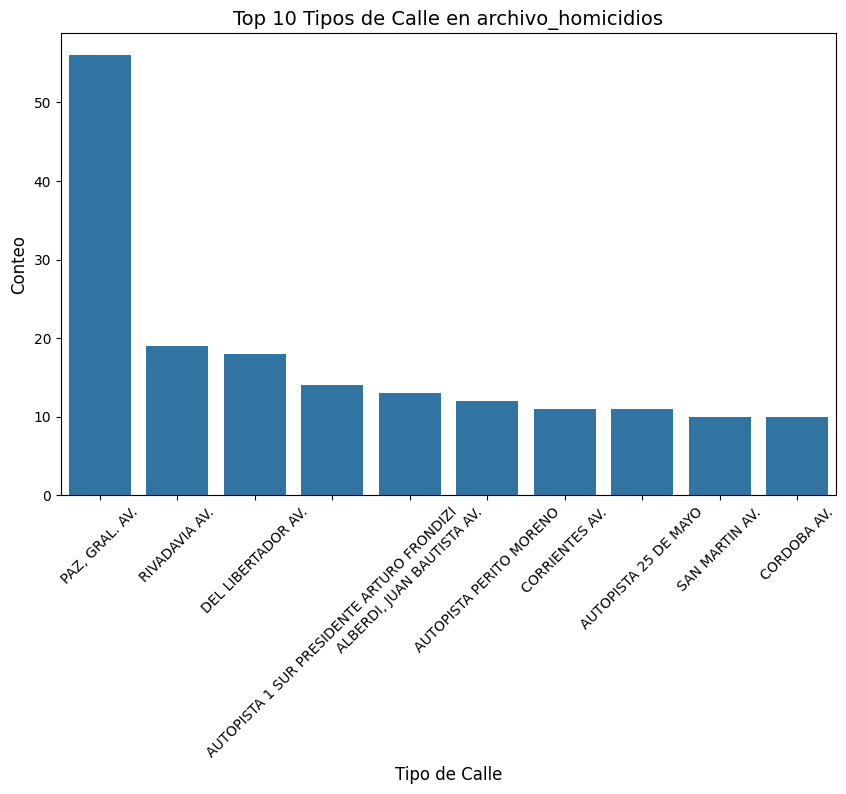

In [31]:
conteo_categorias_top10 = archivo_homicidios['Calle'].value_counts().nlargest(10)

# Configuración del tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Gráfico de barras para las 10 categorías más frecuentes
sns.barplot(x=conteo_categorias_top10.index, y=conteo_categorias_top10.values)

# Título y etiquetas
plt.title('Top 10 Tipos de Calle en archivo_homicidios', fontsize=14)
plt.xlabel('Tipo de Calle', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)

plt.show()

#### Aqui realizamos esta grafica para encontrar las vias mas accidentadas en el pais. Como metrica reelevante, se puede observar,  que 8 de las 10 vias mas accidentadas en la Ciudad de Buenos Aires, son avenidas. Como dato principal destaca que la via mas transitada de la provincia de Buenos Aires, segun el gobierno autonomo de la provincia de Buenos aires, la Av Rivadavia es la segunda Avenida con mas muertes en accidentes de transito. Esto nos lleva a aperturar la siguiente hipotesis: 'El trafico vehicular afecta directamente en la frecuencia de los accidentes con victimas fatales?'

#### Segun el Gobierno de buenos aires, las 10 vias mas transitadas en la provincia de buenos aires, en orden descendete, son: 
1.- Avenida Rivadavia. 
2.- Avenida 9 de Julio. 
3.- Avenida corrientes.
4.- Avenida General paz.
5.- Avenida Libertador. 
6.- Avenida Santa Fe. 
7.- Avenida Pueyrredon.
8.- Avenida Belgrano. 
9.- Avenida callao. 
10.- Avenida San Juan. 

Esto no indica una relacion clara entre la afluencia de trafico y la frecuencia de accidentes mortales, siendo asi que la metrica mas llamativo de la grafica, la clara problematica que posee la Av Gral Paz, con un valor de mas de 50 accidentes mortales en su recorrido. Una cifra que, triplica, en muchos casos, a muchas otras avenidas con una extension o densidad de trafico mayor. Estando la Avenida Gral Paz en mitada de tabla de vias mas transitadas en Buenos Aires.

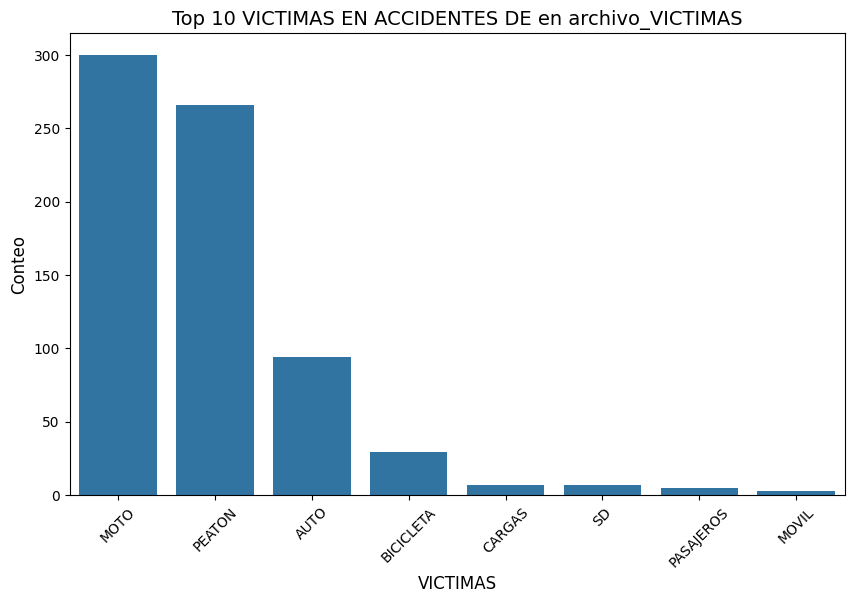

In [34]:
conteo_categorias_top10_victima = archivo_victimas['VICTIMA'].value_counts().nlargest(10)

# Configuración del tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Gráfico de barras para las 10 categorías más frecuentes
sns.barplot(x=conteo_categorias_top10_victima.index, y=conteo_categorias_top10_victima.values)

# Título y etiquetas
plt.title('Top 10 VICTIMAS EN ACCIDENTES DE en archivo_VICTIMAS', fontsize=14)
plt.xlabel('VICTIMAS', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)

plt.show()

#### Se puede apreciar un valor 'SD' que corresponden a valores nulos, se deciden eliminar esos valores tenniendo en cuenta que su cantidad no es relevante en el dataset. 

In [88]:
# Eliminamos las filas donde la columna 'VICTIMA' tenga el valor 'SD'
archivo_victimas = archivo_victimas[archivo_victimas['VICTIMA'] != 'SD']

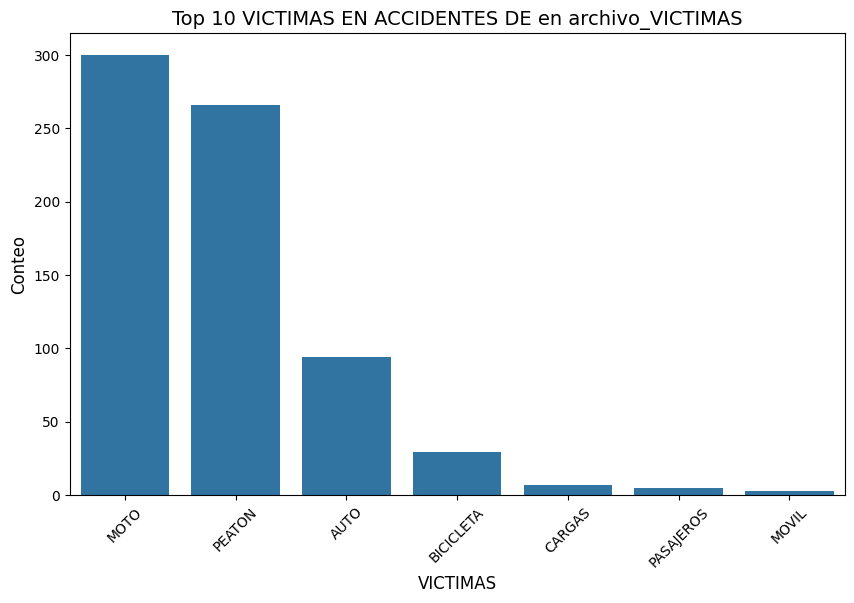

In [89]:
conteo_categorias_top10_victima = archivo_victimas['VICTIMA'].value_counts().nlargest(10)

# Configuración del tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Gráfico de barras para las 10 categorías más frecuentes
sns.barplot(x=conteo_categorias_top10_victima.index, y=conteo_categorias_top10_victima.values)

# Título y etiquetas
plt.title('Top 10 VICTIMAS EN ACCIDENTES DE en archivo_VICTIMAS', fontsize=14)
plt.xlabel('VICTIMAS', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)

plt.show()

####  La grafica nos indica claramente que las personas mas afectadas en el ambito de fatalidades en accidentes de tránsito son los transeuntes y los motociclistas. Habiendo sucedido en el ultimo de estos 298 accidentes fatales. Una relacion de 3 a 1 con el tercer valor mas frecuente de accidentes que son los automoviles con 92 accidentes fatales. Una metrica bastante 'dura' en estos datos: las muertes de los peatones y las motos representan el 83% del total de muertes en accidentes. 

#### SE CAMBIA EL NOMBRE DE LAS COLUMNAS PARA QUE NO HAYA PROBLEMAS AL MOMENTO DE UNIR EL ARCHIVO 

In [35]:
archivo_homicidios.rename(columns={'ID': 'ID_hecho' }, inplace=True)

# df_juegos.rename(columns={'id': 'item_id', 'tags': 'generos del juego', 'app_name': 'nombre_del_juego'}, inplace=True)

In [47]:
df_victima_y_calle = pd.merge( archivo_victimas[['ID_hecho', 'VICTIMA', 'SEXO', 'ROL']], archivo_homicidios[['ID_hecho', 'Calle','TIPO_DE_CALLE']], on='ID_hecho', how='inner')

In [46]:
df_victima_y_calle 

,ID_hecho,VICTIMA,SEXO,ROL,Calle
0,2016-0001,MOTO,MASCULINO,CONDUCTOR,PIEDRA BUENA AV.
1,2016-0002,AUTO,MASCULINO,CONDUCTOR,"PAZ, GRAL. AV."
2,2016-0003,MOTO,MASCULINO,CONDUCTOR,ENTRE RIOS AV.
3,2016-0004,MOTO,MASCULINO,CONDUCTOR,LARRAZABAL AV.
4,2016-0005,MOTO,MASCULINO,CONDUCTOR,SAN JUAN AV.
...,...,...,...,...,...
705,2021-0092,PEATON,FEMENINO,PEATON,RIVADAVIA AV.
706,2021-0093,MOTO,FEMENINO,PASAJERO_ACOMPAÑANTE,RIESTRA AV.
707,2021-0094,MOTO,FEMENINO,PASAJERO_ACOMPAÑANTE,"DELLEPIANE, LUIS, TTE. GRAL."
708,2021-0095,MOTO,MASCULINO,CONDUCTOR,GAONA AV.


#### SE realiza el siguiente grafica con el objetivo de reconocer un patron en las vias de transito con mayor concurrencia de accidentes. Reconociendo asi un identificador unico de accidentes. 

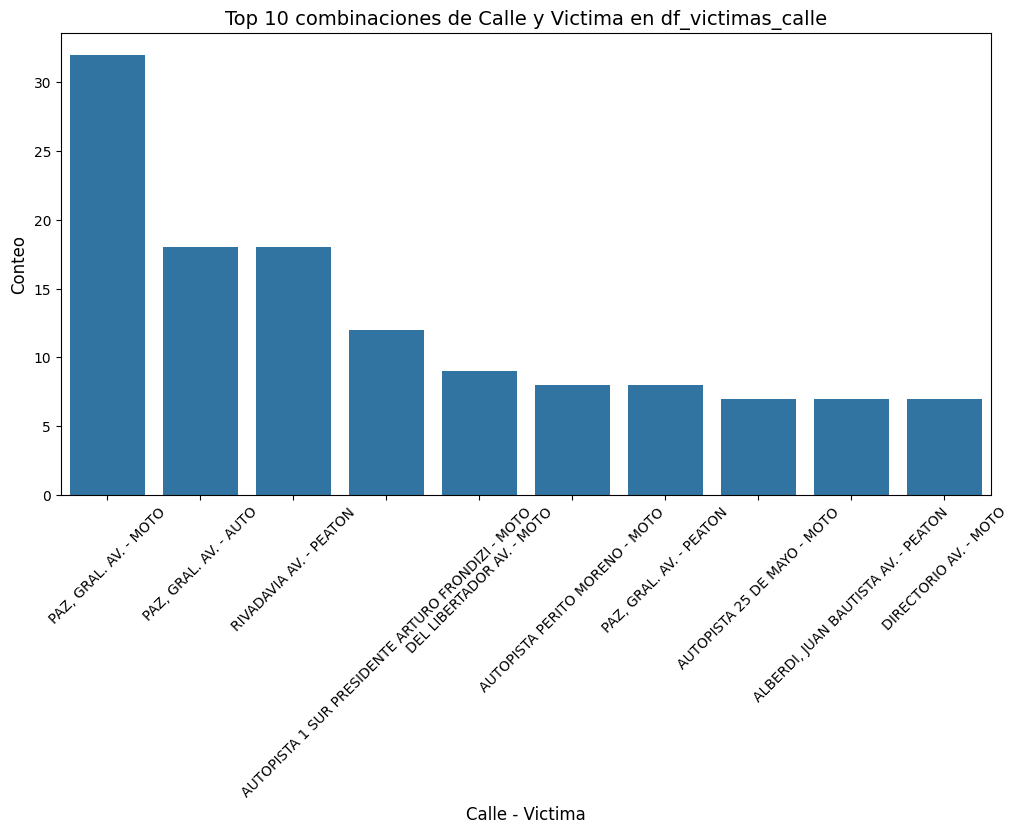

In [40]:
# Crear una nueva columna combinando 'Calle' y 'VICTIMA'
df_victima_y_calle['Calle_Victima'] = df_victima_y_calle['Calle'] + ' - ' + df_victima_y_calle['VICTIMA']

# Obtener los 10 valores más frecuentes de la nueva columna
top_10_calle_victima = df_victima_y_calle['Calle_Victima'].value_counts().nlargest(10)

# Configuración del tamaño de la gráfica
plt.figure(figsize=(12, 6))

# Gráfico de barras para las 10 combinaciones más frecuentes
sns.barplot(x=top_10_calle_victima.index, y=top_10_calle_victima.values)

# Título y etiquetas
plt.title('Top 10 combinaciones de Calle y Victima en df_victimas_calle', fontsize=14)
plt.xlabel('Calle - Victima', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

#### Aqui podemos inferir sobre la confirmacion de el mantenimiento de las tendencias mayoristas en los primeros analisis a amplio espectro. Enfocando las calles mas accidentadas, nos damos cuenta que no es simple coincidencia que los motorizados de 2 ruedas sean los mas afectados por los accidentes de transitos.

<Figure size 1200x800 with 0 Axes>

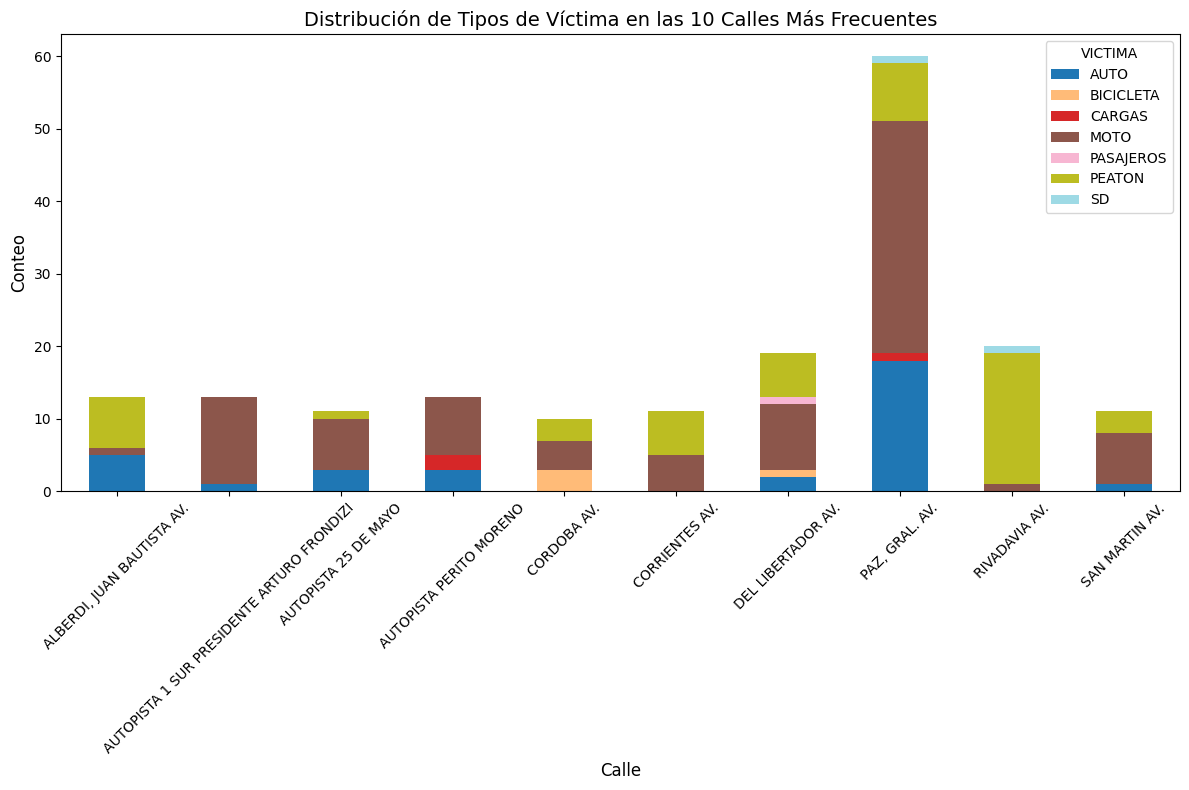

In [58]:
top_10_calles = df_victima_y_calle['Calle'].value_counts().nlargest(10).index

# Filtrar el dataframe para que solo incluya las 10 calles más frecuentes
df_top_calles = df_victima_y_calle[df_victima_y_calle['Calle'].isin(top_10_calles)]

# Crear una tabla pivot para contar la frecuencia de cada tipo de víctima en las 10 calles más frecuentes
pivot_table = pd.crosstab(df_top_calles['Calle'], df_top_calles['VICTIMA'])

# Configuración del tamaño de la gráfica
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras apiladas
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Título y etiquetas
plt.title('Distribución de Tipos de Víctima en las 10 Calles Más Frecuentes', fontsize=14)
plt.xlabel('Calle', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()  # Ajustar el diseño para que las etiquetas no se superpongan
plt.show()

#### Con la pista de el anterior grafico se decidio hacer una inspeccion mas minusiosa. Indagando mas profundamente en las 10 vias mas accidentas de CABA, se encontro la afirmacion que se esperaba. Se concluye como correcta la hipotesis 'Los motociclistas son el grupo, en general, mas afectado en el aspecto fatalidades en accidentes de transito. 

C:\Users\h98go\AppData\Local\Temp\ipykernel_19196\1800702724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Fecha'] = pd.to_datetime(df_combined['AAAA_y'].astype(str) + '-' + df_combined['MM_y'].astype(str) + '-' + df_combined['DD_y'].astype(str))


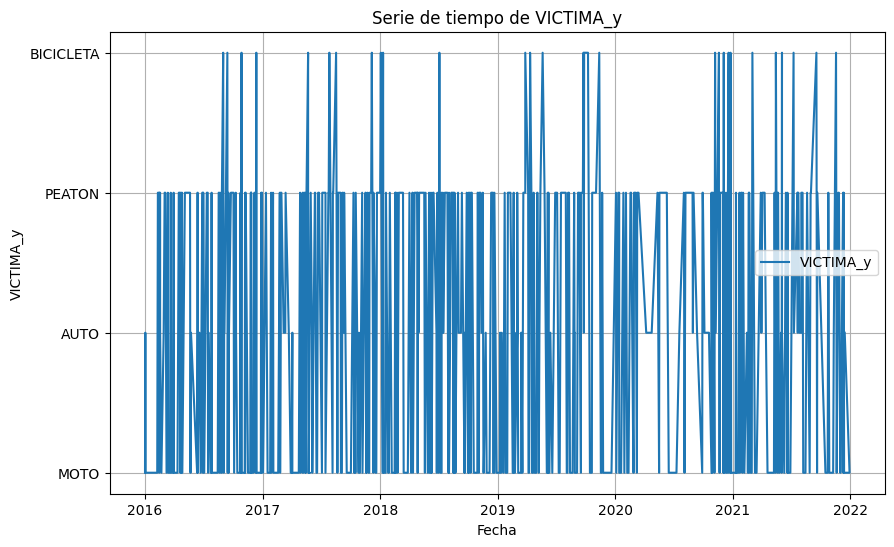

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir las columnas a una única columna de fecha
df_combined['Fecha'] = pd.to_datetime(df_combined['AAAA_y'].astype(str) + '-' + df_combined['MM_y'].astype(str) + '-' + df_combined['DD_y'].astype(str))

# Configurar la columna de fechas como índice
df_combined.set_index('Fecha', inplace=True)

# Filtrar los datos para que solo incluyan los 4 valores más comunes en VICTIMA_y
top_victima_y = df_combined['VICTIMA_y'].value_counts().head(4).index
filtered_df = df_combined[df_combined['VICTIMA_y'].isin(top_victima_y)]

# Graficar la serie de tiempo de la columna 'VICTIMA_y'
plt.figure(figsize=(10,6))
plt.plot(filtered_df.index, filtered_df['VICTIMA_y'], label='VICTIMA_y')
plt.title('Serie de tiempo de VICTIMA_y')
plt.xlabel('Fecha')
plt.ylabel('VICTIMA_y')
plt.legend()
plt.grid(True)
plt.show()


#### Se hace una serie de tiempo con el objetivo de intentar realizar una vizualizacion del comportamiento de la varible 'victimas' en funcion del tiempo. La grafica no nos transmite una relacion clara.

#### EN BASE A TODOS ESTOS DATOS Y RELACIONES DESCUBIERTAS SE DEFINE EL KPI PEDIDO EN EL PROYECTO. TENIENDO COMO OBJETIVO PRINCIPAL SALVAR LA MAYOR CANTIDAD DE VIDAS POSIBLES EON EL MENOR CAMBIO DE LEYES. ES DECIR UN ENDOQUE DE OPTIMIZACION DE RESULTADOS NETOS. eSTO ES ENFOCARSE EN EL GRUPO MAS AFECTADOS, CON EL TIPO DE VIA MAS AFECTADO. BUSCANDO CON ESTO LOGRAR MEDIDAS DE CAMBIO DE AMPLIO ESPECTRO QUE BENEFICIE A LA MAYOR CANTIDAD DE GENTE POSIBLE, RECORDANDO QUE ESTOS NUMEROS NO SON NUMEROS, SON VIDAS DE PERSONAS.
EN BASE AL NUMERO ABSOLUTO DE VICTIMAS FATALES EN ACCIDENTES DE TRANSITO CATEGORIZADO POR EL TIPO VEHICULO ACCIDENTADO. Y AL NUMERO TOTAL DE ACCIDENTES DE TRANSITO SEGUN EL TIPO DE VIA QUE SE TRANSITA, CATEGORIZANDO ASI EL VALOR Y CONSIGUIENDO EL TIPO DE VIA Y MEDIO DE TRANSPORTE MAS ACCIDENTADO.


#### Como es un amplio espectro el analisis efectuado para llegar a este kpi, se plantea un objetivo de REDUCIR UN 5% LOS ACCIDENTE FATALES EN LAS AVENIDAS DONDE LAS MOTOCICLETAS ESTEN INVOLUCRADAS.

#### KPI = CANTIDAD DE ACCIDENTES MORTALES DE MOTO EN LAS AVENIDAS 

## Aqui unimos los datasets para formar uno solo y poder analizar todas las caracteristicas proporcionadas. 

In [ ]:
df_combined = pd.merge(archivo_victimas[[]])

In [90]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 710 entries, 2016-01-01 to 2021-12-15
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_hecho         710 non-null    object 
 1   AAAA_x           710 non-null    int64  
 2   MM_x             710 non-null    int64  
 3   DD_x             710 non-null    int64  
 4   ROL              710 non-null    object 
 5   VICTIMA_x        710 non-null    object 
 6   SEXO             710 non-null    object 
 7   EDAD             710 non-null    float64
 8   N_VICTIMAS       710 non-null    int64  
 9   AAAA_y           710 non-null    int64  
 10  MM_y             710 non-null    int64  
 11  DD_y             710 non-null    int64  
 12  HH               710 non-null    int32  
 13  LUGAR_DEL_HECHO  710 non-null    object 
 14  TIPO_DE_CALLE    710 non-null    object 
 15  Calle            710 non-null    object 
 16  COMUNA           710 non-null    int64  
 1

### Limpiamos las columnas repetidas 

In [92]:
df_combined.drop(columns=['AAAA_x','MM_x', 'DD_x','VICTIMA_x'], inplace=True)

In [93]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 710 entries, 2016-01-01 to 2021-12-15
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_hecho         710 non-null    object 
 1   ROL              710 non-null    object 
 2   SEXO             710 non-null    object 
 3   EDAD             710 non-null    float64
 4   N_VICTIMAS       710 non-null    int64  
 5   AAAA_y           710 non-null    int64  
 6   MM_y             710 non-null    int64  
 7   DD_y             710 non-null    int64  
 8   HH               710 non-null    int32  
 9   LUGAR_DEL_HECHO  710 non-null    object 
 10  TIPO_DE_CALLE    710 non-null    object 
 11  Calle            710 non-null    object 
 12  COMUNA           710 non-null    int64  
 13  pos x            710 non-null    object 
 14  pos y            710 non-null    object 
 15  VICTIMA_y        710 non-null    object 
 16  ACUSADO          710 non-null    object 
dt

#### Convertimos la columna 'id' a tipo numerico 

In [106]:
df_combined['ID_hecho_int'] = df_combined['ID_hecho'].apply(lambda x: int(x.replace('-', '')))

C:\Users\h98go\AppData\Local\Temp\ipykernel_19196\3055823422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['ID_hecho_int'] = df_combined['ID_hecho'].apply(lambda x: int(x.replace('-', '')))


In [107]:
df_combined.drop(columns=['ID_hecho'], inplace= True)

C:\Users\h98go\AppData\Local\Temp\ipykernel_19196\4177636286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.drop(columns=['ID_hecho'], inplace= True)


### Ahora hacemos un analisis muy con los datasets juntos.

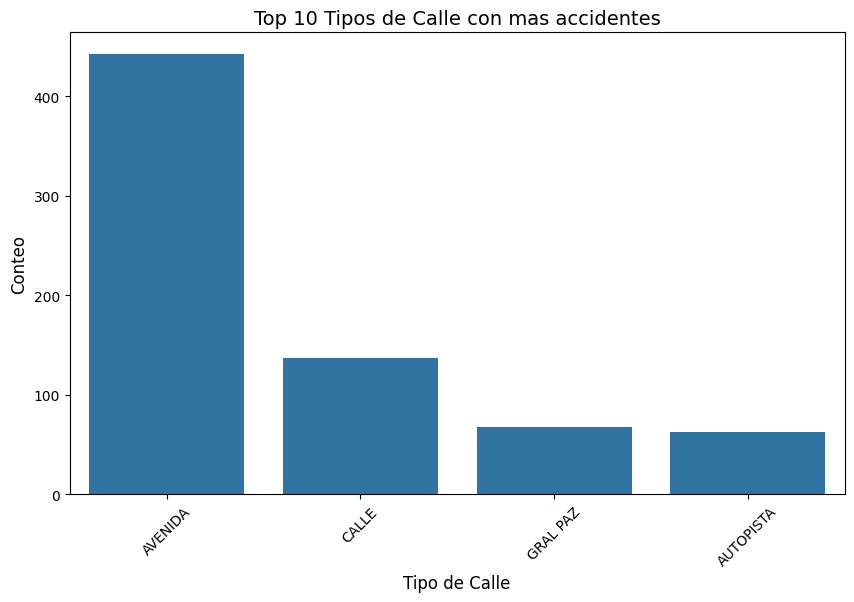

In [95]:
conteo_categorias_top10_tipo_calle = df_combined['TIPO_DE_CALLE'].value_counts()

# Configuración del tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Gráfico de barras para las 10 categorías más frecuentes
sns.barplot(x=conteo_categorias_top10_tipo_calle.index, y=conteo_categorias_top10_tipo_calle.values)

# Título y etiquetas
plt.title('Top 10 Tipos de Calle con mas accidentes', fontsize=14)
plt.xlabel('Tipo de Calle', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)

plt.show()

#### Como podemos observar, la tendencia sigue siendo la misma. Se decide realizar un mimso analisis para los datos unidos para evitar posibles sesgos en los analisisc comprobando asi la hipotesis 'Datos faltantes pueden alterar los resultados en esta grafica'. 

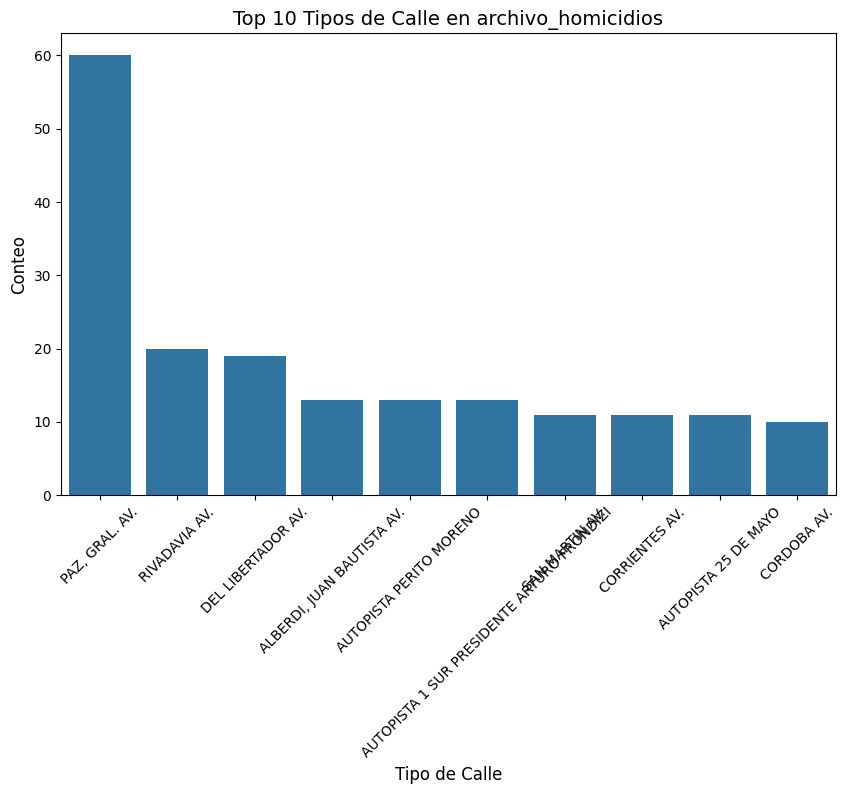

In [96]:
conteo_categorias_top10 = df_combined['Calle'].value_counts().nlargest(10)

# Configuración del tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Gráfico de barras para las 10 categorías más frecuentes
sns.barplot(x=conteo_categorias_top10.index, y=conteo_categorias_top10.values)

# Título y etiquetas
plt.title('Top 10 Tipos de Calle en archivo_homicidios', fontsize=14)
plt.xlabel('Tipo de Calle', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)

plt.show()

#### Este analisis es bajo la misma hipotesis. Los datos son consistentes en comparacion al analisis de los datasets individuales.

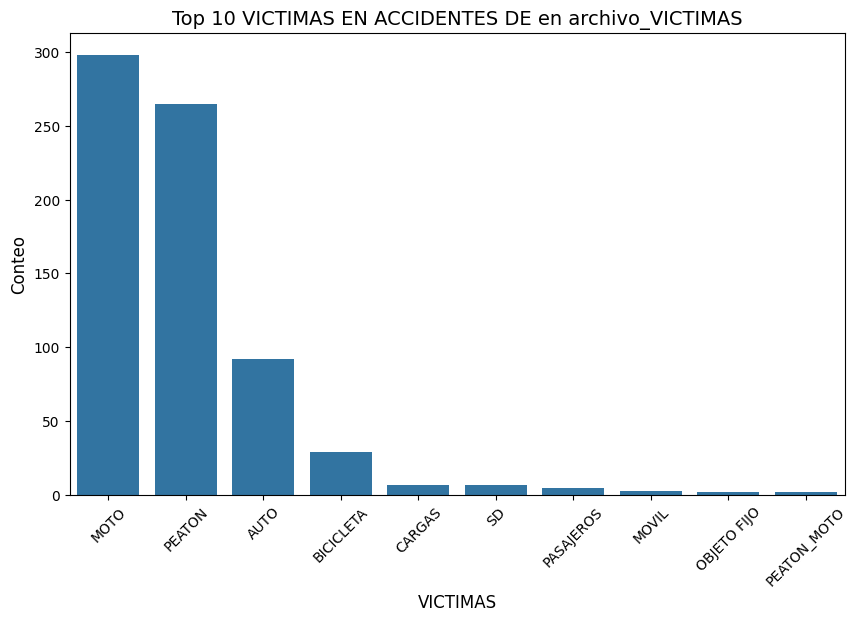

In [99]:
conteo_categorias_top10_victima = df_combined['VICTIMA_y'].value_counts().nlargest(10)

# Configuración del tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Gráfico de barras para las 10 categorías más frecuentes
sns.barplot(x=conteo_categorias_top10_victima.index, y=conteo_categorias_top10_victima.values)

# Título y etiquetas
plt.title('Top 10 VICTIMAS EN ACCIDENTES DE en archivo_VICTIMAS', fontsize=14)
plt.xlabel('VICTIMAS', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)

plt.show()

#### Analisis hecho bajo la misma hipotesis. Datos consistentes en comparacion con el primer analisis. 

#### Eliminacion de valores nulos.

In [100]:
df_combined = df_combined[df_combined['VICTIMA_y'] != 'SD']

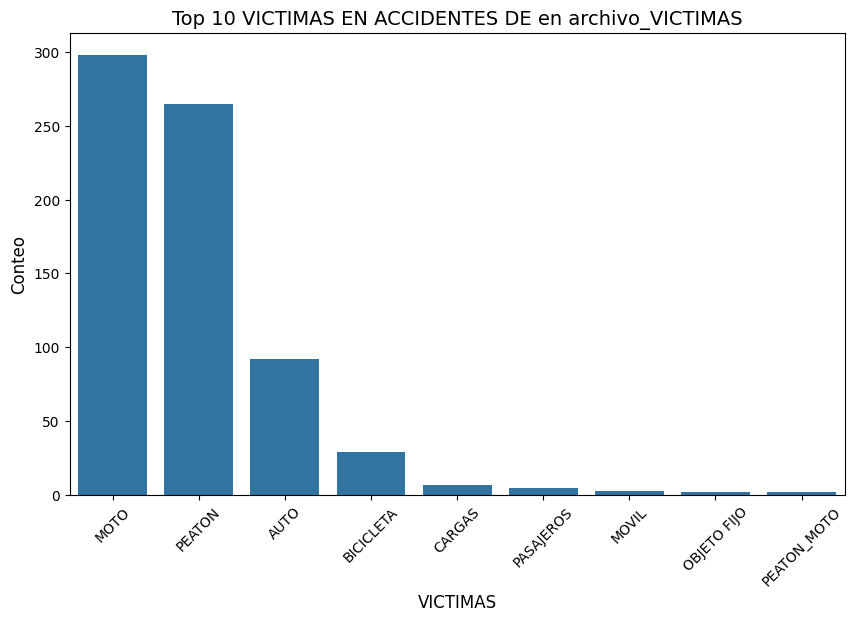

In [101]:

conteo_categorias_top10_victima = df_combined['VICTIMA_y'].value_counts().nlargest(10)

# Configuración del tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Gráfico de barras para las 10 categorías más frecuentes
sns.barplot(x=conteo_categorias_top10_victima.index, y=conteo_categorias_top10_victima.values)

# Título y etiquetas
plt.title('Top 10 VICTIMAS EN ACCIDENTES DE en archivo_VICTIMAS', fontsize=14)
plt.xlabel('VICTIMAS', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)

plt.show()

#### Ahora bien, negar los datos es imposible. Claramente hay un problema con los vehiculos motorizados de 2 ruedas. Esto abre la apertur a una hipotesis muy incinuante acerca del control sobre las personas que circulan en vehiculos motorizados. ¿Aumentando el control sobre los motociclista reducira la mortalidad en accidentes viales?

#### Exportamos el dataset para crear un punto de guadado. 

In [112]:
df_combined.to_csv('base de datos del 2do proyecto.csv', index=False)

#### Hacemos un heatmap para buscar la relacion entre las variables respectivas.

In [109]:
profile1 = ProfileReport(df_combined, title="Reporte de df combined", explorative=True)

### Decido usar una herramienta automatizada de EDA para constratar la informacion obtenida y tener la posibilidad de ampliar el abanico de investigacion.

In [110]:
profile1.to_file("reporte del archivo combinado.html")

C:\Users\h98go\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Summarize dataset:  79%|███████▉  | 19/24 [00:01<00:00,  9.81it/s, Calculate auto correlation]       C:\Users\h98go\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 3 0 2 7 8 6 0 4 2 9 6 3 6 9 2 1 3 3 4 7 5 5 2 0 4 3 0 4 4 7 8 4 2 7 3
 1 3 9 8 1 6 6 7 6 7 9 1 6 2 9 6 9 9 7 2 3 7 8

![Gráfico 2](heatmap1.png)


#### El objetivo de este heatmap es encontrar la tasa de relacion de las variables entre si, ya que tras el analisis general que se ha hecho no se puede determinar un patron aparente.

#### Este heatmap podemos ver la poca correlacion y la varianza gigante del dataset proporcionado. 
Sin embargo se puede apreciar la inferencia correcta que llevo al desarrollo del kpi, vemos como la presencia del tipo de calle con mas accidentes, la avenida, y la comuna se ve directamente reflejado en los accidentes de transito.

Tambien podemos deducir que el dia no tiene mucha correlacion con los accidentes mortales, descartando asi varias hipotesis interesantes como:  Los fines de semana, aumentan los casos de accidentes mortales, siendo los dias de mayor afluencia de personas en vias publicas. 



#### Se puede apreciar una leve relacion entre la hora y los acccidentes de transito, pero no es nada concluyente. 

#### Se agrega la columna 'Poblacion' al dataset 

In [114]:

# Diccionario con los números de las comunas y sus respectivas poblaciones
poblacion_comunas = {
    1: 253010,
    2: 147151,
    3: 217871,
    4: 239445,
    5: 188144,
    6: 209408,
    7: 284486,
    8: 232344,
    9: 196419,
    10: 180245,
    11: 210067,
    12: 222862,
    13: 200954,
    14: 250767,
    15: 208716
}

# Se agrega la poblacion al dataset en función de la columna 'Comuna'
df_combined['Poblacion'] = df_combined['COMUNA'].map(poblacion_comunas)



C:\Users\h98go\AppData\Local\Temp\ipykernel_19196\3183382416.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Poblacion'] = df_combined['COMUNA'].map(poblacion_comunas)


### Exportamos el dataset final para su trabajo con la herramienta de vizualizacion. Fin de Proyecto

In [115]:
df_combined.to_csv('proyecto finalizado.csv')